This Notebook is part of the repository [GPU4SNN](https://github.com/Crypto-TII/GPU4SNN). 
Please download the repository to run the following content.

The following code will generate folders with the simulation results for the SNN-simulation algorithms under consideration, as well as figures for comparison for major metrics (`simulation time`, `total spike counts` and `total elapsed time with data transfers`).

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-Results:-Run-gpu4snn.py" data-toc-modified-id="Create-Results:-Run-gpu4snn.py-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create Results: Run <code>gpu4snn.py</code></a></span></li><li><span><a href="#Definitions" data-toc-modified-id="Definitions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Definitions</a></span><ul class="toc-item"><li><span><a href="#Create-the-Figures-for-the-Test-Run-Above" data-toc-modified-id="Create-the-Figures-for-the-Test-Run-Above-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Create the Figures for the Test-Run Above</a></span><ul class="toc-item"><li><span><a href="#function-to-fetch-results" data-toc-modified-id="function-to-fetch-results-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>function to fetch results</a></span></li><li><span><a href="#metric-=-simulation-time" data-toc-modified-id="metric-=-simulation-time-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>metric = <code>simulation time</code></a></span></li><li><span><a href="#metric-=-total-spike-counts" data-toc-modified-id="metric-=-total-spike-counts-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>metric = <code>total spike counts</code></a></span></li><li><span><a href="#metric-=-Total-Elapsed-Time-(ms)-with-..." data-toc-modified-id="metric-=-Total-Elapsed-Time-(ms)-with-...-2.1.4"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>metric = <code>Total Elapsed Time (ms) with ...</code></a></span></li><li><span><a href="#table-with-speed-up-factors" data-toc-modified-id="table-with-speed-up-factors-2.1.5"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>table with speed-up factors</a></span></li></ul></li><li><span><a href="#Create-the-Figures-in-the-Publication" data-toc-modified-id="Create-the-Figures-in-the-Publication-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Create the Figures in the Publication</a></span><ul class="toc-item"><li><span><a href="#function-to-fetch-results" data-toc-modified-id="function-to-fetch-results-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>function to fetch results</a></span></li><li><span><a href="#metric-=-simulation-time" data-toc-modified-id="metric-=-simulation-time-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>metric = <code>simulation time</code></a></span></li><li><span><a href="#metric-=-total-spike-counts" data-toc-modified-id="metric-=-total-spike-counts-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>metric = <code>total spike counts</code></a></span></li><li><span><a href="#metric-=-Total-Elapsed-Time-(ms)-with-..." data-toc-modified-id="metric-=-Total-Elapsed-Time-(ms)-with-...-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>metric = <code>Total Elapsed Time (ms) with ...</code></a></span></li><li><span><a href="#table-with-speed-up-factors" data-toc-modified-id="table-with-speed-up-factors-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>table with speed-up factors</a></span></li></ul></li></ul></li></ul></div>

# Create Results: Run `gpu4snn.py` 

In [5]:
#git clone https://github.com/Crypto-TII/GPU4SNN
#%cd GPU4SNN/                                           # should be in ./GPU4SNN

In [6]:
%%bash
python gpu4snn.py 'Quadro' '2000'

rm *.o *.d gpu4snn
rm -rf Results
nvcc -ccbin g++ -arch=sm_52 -I/usr/local/cuda/samples/common/inc/ -I/usr/local/cuda/include/  -G -g -O0 -gencode arch=compute_75,code=sm_75  -odir "." -M -o "gpu4snn.d" "gpu4snn.cu"
nvcc -ccbin g++ -arch=sm_52 -I/usr/local/cuda/samples/common/inc/ -I/usr/local/cuda/include/  -G -g -O0 --compile --relocatable-device-code=true -gencode arch=compute_75,code=sm_75 -x cu -o  "gpu4snn.o" "gpu4snn.cu"
nvcc -ccbin g++ -arch=sm_52 -I/usr/local/cuda/samples/common/inc/ -I/usr/local/cuda/include/  --cudart static --relocatable-device-code=true -gencode arch=compute_75,code=sm_75 -link -o  gpu4snn  gpu4snn.o
Number of neurons: 2500
number of synapses per neuron: 1000
2500 Neurons in the network: 2000 excitatory and 500 inhibitory 
Allocating space on GPU memory: 
Memory allocated for neurons
Memory allocated for connectivity matrix
Memory allocated for synapses
Launched blocks of size 1024. Theoretical occupancy: 1.000000
blockSizeN = 1024 , gridSizeN = 3, minGrid

rm: cannot remove '*.o': No such file or directory
rm: cannot remove '*.d': No such file or directory
rm: cannot remove 'gpu4snn': No such file or directory
make: *** [makefile:21: clean] Error 1


In [7]:
%%bash
python gpu4snn.py 'Quadro' '10000'

rm *.o *.d gpu4snn
rm -rf Results
nvcc -ccbin g++ -arch=sm_52 -I/usr/local/cuda/samples/common/inc/ -I/usr/local/cuda/include/  -G -g -O0 -gencode arch=compute_75,code=sm_75  -odir "." -M -o "gpu4snn.d" "gpu4snn.cu"
nvcc -ccbin g++ -arch=sm_52 -I/usr/local/cuda/samples/common/inc/ -I/usr/local/cuda/include/  -G -g -O0 --compile --relocatable-device-code=true -gencode arch=compute_75,code=sm_75 -x cu -o  "gpu4snn.o" "gpu4snn.cu"
nvcc -ccbin g++ -arch=sm_52 -I/usr/local/cuda/samples/common/inc/ -I/usr/local/cuda/include/  --cudart static --relocatable-device-code=true -gencode arch=compute_75,code=sm_75 -link -o  gpu4snn  gpu4snn.o
Number of neurons: 2500
number of synapses per neuron: 1000
2500 Neurons in the network: 2000 excitatory and 500 inhibitory 
Allocating space on GPU memory: 
Memory allocated for neurons
Memory allocated for connectivity matrix
Memory allocated for synapses
Launched blocks of size 1024. Theoretical occupancy: 1.000000
blockSizeN = 1024 , gridSizeN = 3, minGrid

mkdir: cannot create directory ‘Quadro’: File exists


# Definitions

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 8}

matplotlib.rc('font', **font)

import os
import pandas as pd

pd.set_option('display.max_rows', 100)

In [9]:
class algorithm:
    def __init__(self, name, color, x, number_in_Results):
        self.name  = name 
        self.color = color
        self.x = x
        self.number_in_Results = number_in_Results
        
        self.values = {}
        
    def add_value(self, gpu_name, value, metric, mode, iterations):
        self.values[gpu_name, metric, mode, iterations] = value
        
    def get_value(self, gpu_name, metric, mode, iterations): 
        return self.values[gpu_name, metric, mode, iterations]

In [10]:
def human_format(num):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.2f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

def human_format(num):
    return f'{num:,.0f}'

def human_format3(num):
    return f'{num:,.3f}'

In [11]:
def create_plot(metric, gpu_name, iterations, formatting=human_format, figure_path = 'Figures_60_40/'):

    # CONFIGURE THE PLOT. 
    #----------------------
    scale = 0.5 # scale the aspect ratio by a factor of 0.5, since we will have two plots beside each other
    n_col = 2 # 2 plots for mode 1 and 2 

        # width0 and height0 for a full-sized plot
        #--------------------------------------
        # plt.rcParams["figure.figsize"] = [6.0, 4.0] 
        # typical textwidht in latex: 5.8 inch
        # 5./6.*np.array([6.,4.]) = [5.8, 3.9]
    width0, height0 = (5.8, 3.9)

    width  = scale * 5.8 
    height = 0.75 * n_col * scale * 3.8 
    print(height)
    
    pad_title = 5 # 12
    bar_width = .5

    fig, axes = plt.subplots(n_col, 1, figsize=(width, height), dpi=150) 

    #plt.suptitle(f"'{metric}'\n for {iterations:,} iterations")#, fontweight='bold')

    # MODE 1 PLOT
    #-----------------
    mode = 1
    ax = axes[0]
    plt.sca(ax)

    dy = 0.01*algos[0].get_value(gpu_name, metric, mode, iterations)

    for algo in algos: 
        bar_height = algo.get_value(gpu_name, metric, mode, iterations)
        plt.bar(algo.x, bar_height, color=algo.color, width=bar_width)
        value_str = formatting(bar_height)
        plt.text(algo.x, bar_height+dy, f'{value_str}', va='bottom', ha='center', 
                 color=algo.color, fontsize='small')

    plt.tick_params(left=False, bottom=False)
    #
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    #plt.suptitle(f"bar height shows '{metric}'")#, fontweight='bold')
    plt.title(f'{metric} in Mode {mode}', pad=pad_title, fontsize='small')
    #plt.xlabel('Algorithm', fontweight='bold')

    plt.xticks(ticks=[algo.x for algo in algos], 
               labels=[algo.name for algo in algos]);

    ax.get_yaxis().set_ticks([]);
    
    y_upper = ax.get_ylim()[1]
    plt.ylim(top=1.2*y_upper)

    #plt.tight_layout(rect=[0, 0, 1, 1.13])

    # MODE 1 PLOT
    #-----------------
    mode = 2
    ax = axes[1]
    plt.sca(ax)

    dy = 0.01*algos[0].get_value(gpu_name, metric, mode, iterations)

    for algo in algos: 
        bar_height = algo.get_value(gpu_name, metric, mode, iterations)
        plt.bar(algo.x, bar_height, color=algo.color, width=bar_width)
        value_str = formatting(bar_height)
        plt.text(algo.x, bar_height+dy, f'{value_str}', va='bottom', ha='center', 
                 color=algo.color, fontsize='small')

    plt.tick_params(left=False, bottom=False)
    #
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_visible(False)

    plt.title(f'{metric} in Mode {mode}', pad=pad_title, fontsize='small')
    #plt.xlabel('Algorithm', fontweight='bold')

    plt.xticks(ticks=[algo.x for algo in algos], 
               labels=[algo.name for algo in algos]);

    ax.get_yaxis().set_ticks([]);

    y_upper = ax.get_ylim()[1]
    plt.ylim(top=1.2*y_upper)
    
    
    #plt.tight_layout(rect=[0, 0, 1, 1.05])
    plt.tight_layout()
    #plt.subplots_adjust(hspace=.5)
    metric_savename = metric.replace(' ', '')
    metric_savename = metric_savename.replace('(', '')
    metric_savename = metric_savename.replace(')', '')
    metric_savename = metric_savename.replace('\n', '')
    plt.savefig(figure_path+f'{metric_savename}_{gpu_name}_{iterations}iterations.pdf', bbox_inches='tight')

## Create the Figures for the Test-Run Above 

In [12]:
suffix       = '_quadro'
figure_path  = f'Figures{suffix}/'
results_path = f'Quadro/'

In [13]:
try: 
    os.makedirs(figure_path)
except FileExistsError: 
    pass

In [14]:
AP = algorithm('AP', '#5DAA0F', 0, '0')
N  = algorithm('N' , '#139FC0', 1, '1')
S  = algorithm('S' , '#08909D', 2, '2')
SKL = algorithm('SKL', '#6400FF', 3.2, '4') 
AB = algorithm('AB', '#3B407D',  4.2, '3')

algos = [AP, N, S, AB, SKL]

### function to fetch results 

In [15]:
def fetch_sim_overview(number_in_Results, gpu_name, iterations, mode, N=2500, S=1000, results_path='Results_60_40/'): 
    """
    returns dictionary: 
        [{'N': 2500,
      'elapsed(ms)': 36.911,
      'elapsedwithdata(ms)': 719.1289999999999,
      'totalspkcount': 3005}]
    """
    regime = mode
    path = f'{results_path}{iterations}/Results/N{N}Nsyn{S}Regime{regime}Alg{number_in_Results}/'
    csvfile = path + 'sim_overview.csv'
    with open(csvfile, 'r', encoding ='UTF-8', newline = '') as csvfile:
        reader =  pd.read_csv(csvfile, delimiter=' ').to_dict(orient="records")
    return reader[0]

### metric = `simulation time` 

In [18]:
# LOAD THE DATA.
#------------------
metric     = 'Elapsed Time (ms) in Kernel Invocations from CPU'

for gpu_name in ['Quadro']:
    for iterations in [10_000, 2_000]:
        for mode in [0,1,2]:
            for algo in algos: 
                algo_number_in_Results = algo.number_in_Results
                value = fetch_sim_overview(algo_number_in_Results, gpu_name, iterations, mode,results_path=results_path)['elapsed(ms)']
                algo.add_value(gpu_name, value, metric, mode, iterations)

2.8499999999999996
2.8499999999999996


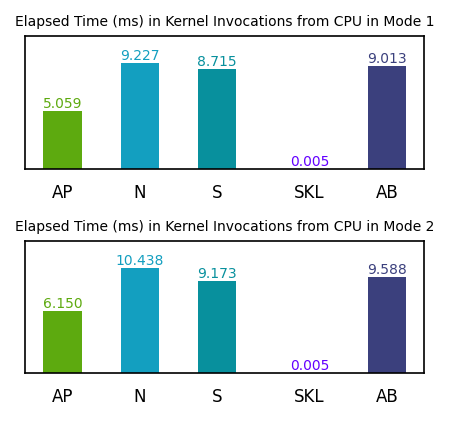

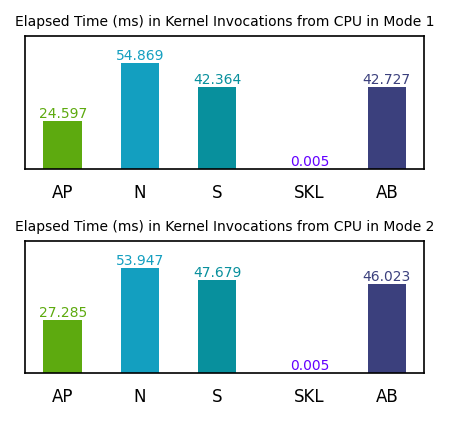

In [19]:
for iterations in [2_000, 10_000]:
    for gpu_name in ['Quadro']:
        create_plot(metric, gpu_name, iterations, formatting=human_format3,figure_path=figure_path)

###  metric = `total spike counts`

In [20]:
# LOAD THE DATA.
#------------------
metric     ='Total Spike Count'

for gpu_name in ['Quadro']:
    for iterations in [10_000, 2_000]:
        for mode in [0,1,2]:
            for algo in algos: 
                algo_number_in_Results = algo.number_in_Results
                value = fetch_sim_overview(algo_number_in_Results, gpu_name, iterations, mode, results_path=results_path)['totalspkcount']
                algo.add_value(gpu_name, value, metric, mode, iterations)

2.8499999999999996
2.8499999999999996


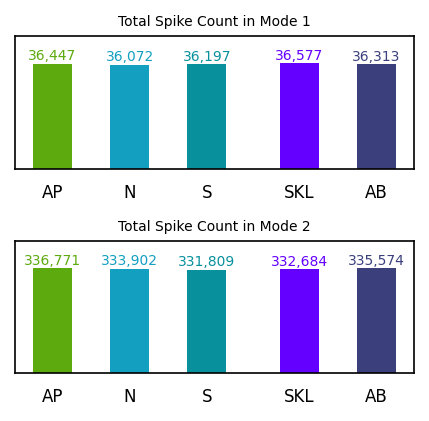

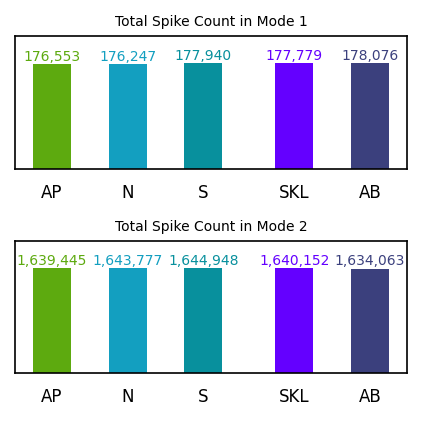

In [22]:
for iterations in [2_000, 10_000]:
    for gpu_name in ['Quadro']:
        create_plot(metric, gpu_name, iterations, formatting=human_format, figure_path=figure_path)

###  metric = `Total Elapsed Time (ms) with ...`

In [25]:
# LOAD THE DATA.
#------------------
metric = 'Total Elapsed Time (ms) with Data Transfers \n between CPU and GPU'

for gpu_name in ['Quadro']:
    for iterations in [10_000, 2_000]:
        for mode in [0,1,2]:
            for algo in algos: 
                algo_number_in_Results = algo.number_in_Results
                value = fetch_sim_overview(algo_number_in_Results, gpu_name, iterations, mode, results_path=results_path)['elapsedwithdata(ms)']
                algo.add_value(gpu_name, value, metric, mode, iterations)

2.8499999999999996
2.8499999999999996


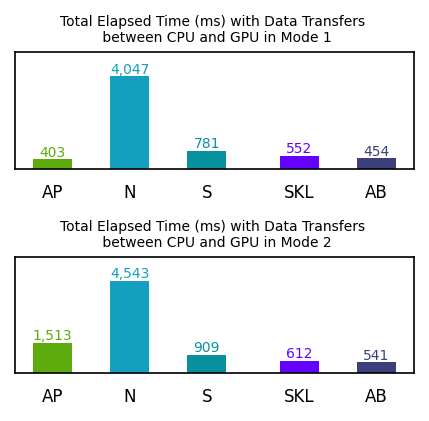

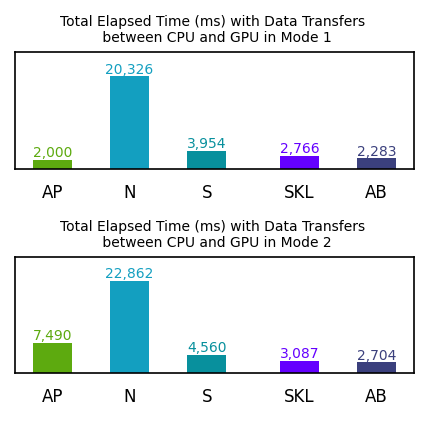

In [26]:
for iterations in [2_000, 10_000]:
    for gpu_name in ['Quadro']:
        create_plot(metric, gpu_name, iterations, formatting=human_format, figure_path=figure_path)

### table with speed-up factors 

In [27]:
metric = 'Total Elapsed Time (ms) with Data Transfers \n between CPU and GPU'

rows = []

for gpu_name in ['Quadro']:
    for mode in [1,2]: # Mode 0 (quiet): not as many spikes (not many spikes --> go with CPU, not GPU)
        for algo_new in [SKL, AB]:
            for algo_old in [AP, N, S]:
                for iterations in [2_000, 10_000]:
                
                    t_old = algo_old.get_value(gpu_name, metric, mode, iterations)
                    t_new = algo_new.get_value(gpu_name, metric, mode, iterations)
                    
                    spikes_old = algo_old.get_value(gpu_name, 'Total Spike Count', mode, iterations)
                    spikes_new = algo_new.get_value(gpu_name, 'Total Spike Count', mode, iterations)
                    
                    speed_up = 1. / (t_new/t_old)
                    
                    if speed_up <= 1.0: is_speed_up = 'N'
                    else: is_speed_up = 'Y'
                    
                    rows.append([gpu_name, 
                                iterations, 
                                mode, 
                                algo_old.name, 
                                algo_new.name, 
                                t_old, 
                                t_new,
                                speed_up, 
                                is_speed_up, spikes_old, spikes_new])
                    

df = pd.DataFrame(rows, columns=['GPU', 'Iterations', 'Mode', 'Old Alg.', 'New Alg.', 't_old', 't_new', 'Speed Up', 'new_is_speed_up (Y/N)', 'Spikes_old', 'Spikes_new'])
df.to_excel(figure_path + f'Speed-Up Factors{suffix}.xlsx')
df

,GPU,Iterations,Mode,Old Alg.,New Alg.,t_old,t_new,Speed Up,new_is_speed_up (Y/N),Spikes_old,Spikes_new
0,Quadro,2000,1,AP,SKL,402.648,552.060,0.729356,N,36447,36577
1,Quadro,10000,1,AP,SKL,2000.140,2766.060,0.723101,N,176553,177779
2,Quadro,2000,1,N,SKL,4046.620,552.060,7.330037,Y,36072,36577
3,Quadro,10000,1,N,SKL,20326.000,2766.060,7.348358,Y,176247,177779
4,Quadro,2000,1,S,SKL,780.963,552.060,1.414634,Y,36197,36577
5,Quadro,10000,1,S,SKL,3953.610,2766.060,1.429329,Y,177940,177779
6,Quadro,2000,1,AP,AB,402.648,454.153,0.886591,N,36447,36313
7,Quadro,10000,1,AP,AB,2000.140,2282.520,0.876286,N,176553,178076
8,Quadro,2000,1,N,AB,4046.620,454.153,8.910257,Y,36072,36313
9,Quadro,10000,1,N,AB,20326.000,2282.520,8.905070,Y,176247,178076


## Create the Figures in the Publication 

In [28]:
suffix       = '_80_20'
figure_path  = f'Figures{suffix}/'
results_path = f'Results{suffix}/'

In [29]:
AP = algorithm('AP', '#5DAA0F', 0, '0')
N  = algorithm('N' , '#139FC0', 1, '1')
S  = algorithm('S' , '#08909D', 2, '2')
SKL = algorithm('SKL', '#6400FF', 3.2, '4') 
AB = algorithm('AB', '#3B407D',  4.2, '3')

algos = [AP, N, S, AB, SKL]

### function to fetch results 

In [30]:
def fetch_sim_overview(number_in_Results, gpu_name, iterations, mode, N=2500, S=1000, results_path='Results_60_40/'): 
    """
    returns dictionary: 
        [{'N': 2500,
      'elapsed(ms)': 36.911,
      'elapsedwithdata(ms)': 719.1289999999999,
      'totalspkcount': 3005}]
    """
    regime = mode
    path = f'{results_path}Results_{gpu_name}/Iter_{iterations}/Results/N{N}Nsyn{S}Regime{regime}Alg{number_in_Results}/'
    csvfile = path + 'sim_overview.csv'
    with open(csvfile, 'r', encoding ='UTF-8', newline = '') as csvfile:
        reader =  pd.read_csv(csvfile, delimiter=' ').to_dict(orient="records")
    return reader[0]

### metric = `simulation time` 

In [34]:
# LOAD THE DATA.
#------------------
metric     = 'Elapsed Time (ms) in Kernel Invocations from CPU'

for gpu_name in ['Titan', 'Quadro']:
    for iterations in [10_000, 2_000]:
        for mode in [0,1,2]:
            for algo in algos: 
                algo_number_in_Results = algo.number_in_Results
                value = fetch_sim_overview(algo_number_in_Results, gpu_name, iterations, mode,results_path=results_path)['elapsed(ms)']
                algo.add_value(gpu_name, value, metric, mode, iterations)

2.8499999999999996
2.8499999999999996
2.8499999999999996
2.8499999999999996


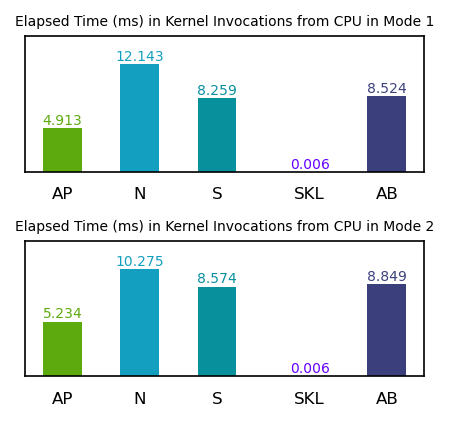

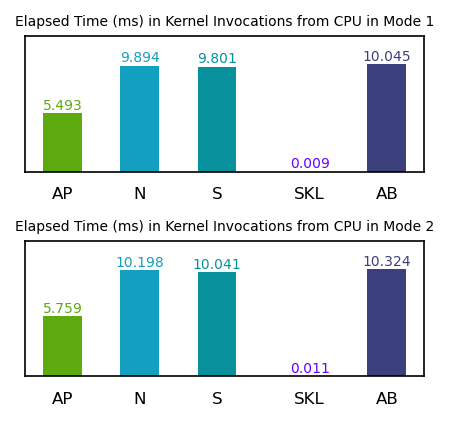

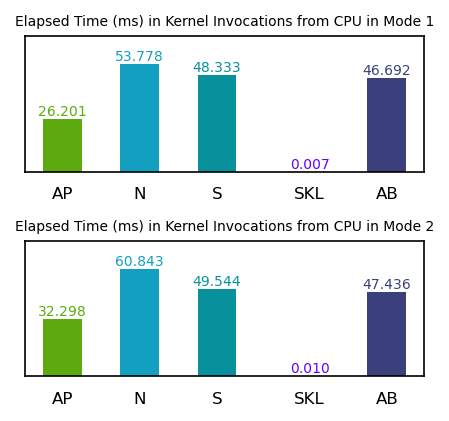

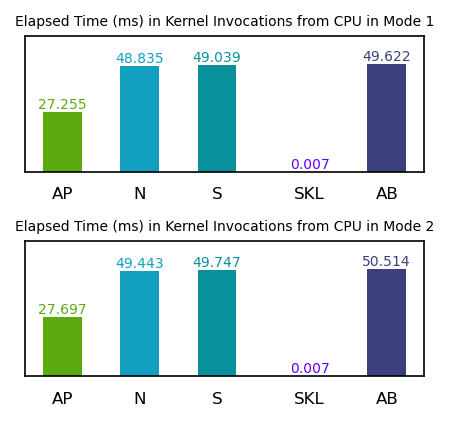

In [35]:
for iterations in [2_000, 10_000]:
    for gpu_name in ['Quadro', 'Titan']:
        create_plot(metric, gpu_name, iterations, formatting=human_format3,figure_path=figure_path)

###  metric = `total spike counts`

In [36]:
# LOAD THE DATA.
#------------------
metric     ='Total Spike Count'

for gpu_name in ['Titan', 'Quadro']:
    for iterations in [10_000, 2_000]:
        for mode in [0,1,2]:
            for algo in algos: 
                algo_number_in_Results = algo.number_in_Results
                value = fetch_sim_overview(algo_number_in_Results, gpu_name, iterations, mode, results_path=results_path)['totalspkcount']
                algo.add_value(gpu_name, value, metric, mode, iterations)

2.8499999999999996
2.8499999999999996
2.8499999999999996
2.8499999999999996


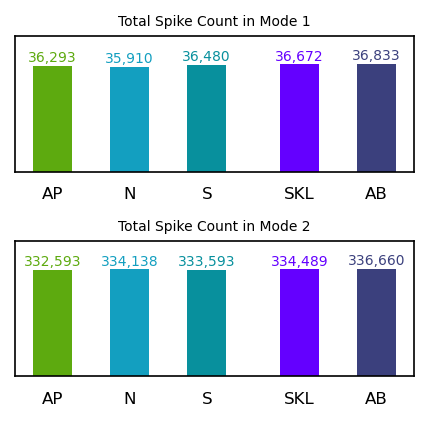

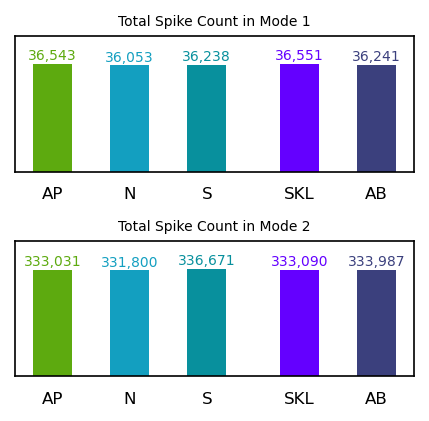

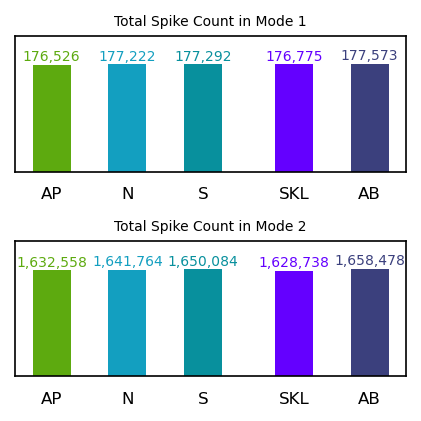

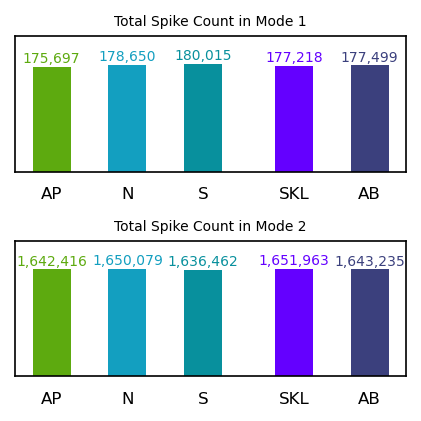

In [37]:
for iterations in [2_000, 10_000]:
    for gpu_name in ['Quadro', 'Titan']:
        create_plot(metric, gpu_name, iterations, formatting=human_format, figure_path=figure_path)

###  metric = `Total Elapsed Time (ms) with ...`

In [38]:
# LOAD THE DATA.
#------------------
metric = 'Total Elapsed Time (ms) with Data Transfers \n between CPU and GPU'

for gpu_name in ['Titan', 'Quadro']:
    for iterations in [10_000, 2_000]:
        for mode in [0,1,2]:
            for algo in algos: 
                algo_number_in_Results = algo.number_in_Results
                value = fetch_sim_overview(algo_number_in_Results, gpu_name, iterations, mode, results_path=results_path)['elapsedwithdata(ms)']
                algo.add_value(gpu_name, value, metric, mode, iterations)

2.8499999999999996
2.8499999999999996
2.8499999999999996
2.8499999999999996


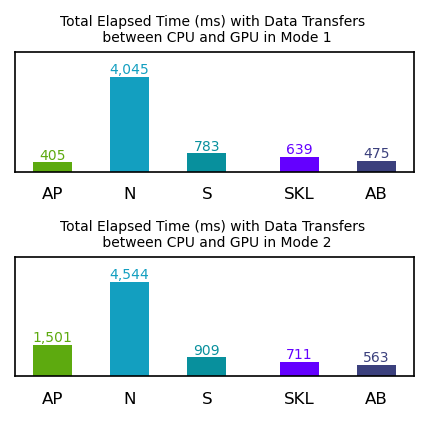

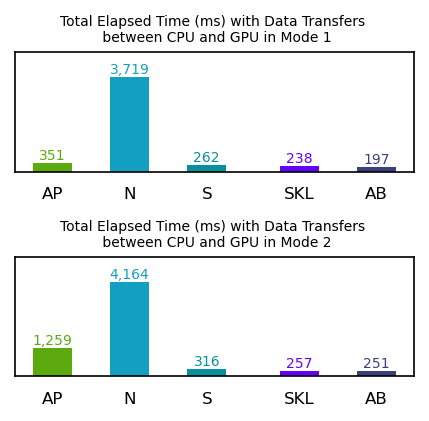

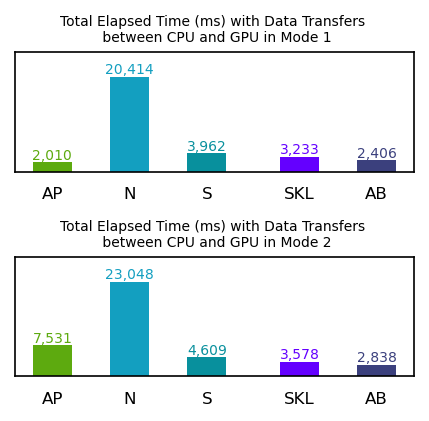

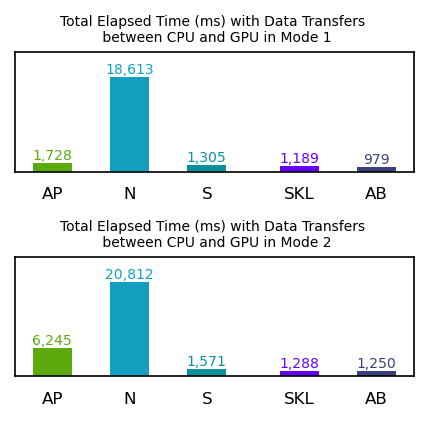

In [39]:
for iterations in [2_000, 10_000]:
    for gpu_name in ['Quadro', 'Titan']:
        create_plot(metric, gpu_name, iterations, formatting=human_format, figure_path=figure_path)

### table with speed-up factors 

In [41]:
metric = 'Total Elapsed Time (ms) with Data Transfers \n between CPU and GPU'

rows = []

for gpu_name in ['Quadro', 'Titan']:
    for mode in [1,2]: # Mode 0 (quiet): not as many spikes (not many spikes --> go with CPU, not GPU)
        for algo_new in [SKL, AB]:
            for algo_old in [AP, N, S]:
                for iterations in [2_000, 10_000]:
                
                    t_old = algo_old.get_value(gpu_name, metric, mode, iterations)
                    t_new = algo_new.get_value(gpu_name, metric, mode, iterations)
                    
                    spikes_old = algo_old.get_value(gpu_name, 'Total Spike Count', mode, iterations)
                    spikes_new = algo_new.get_value(gpu_name, 'Total Spike Count', mode, iterations)
                    
                    speed_up = 1. / (t_new/t_old)
                    
                    if speed_up <= 1.0: is_speed_up = 'N'
                    else: is_speed_up = 'Y'
                    
                    rows.append([gpu_name, 
                                iterations, 
                                mode, 
                                algo_old.name, 
                                algo_new.name, 
                                t_old, 
                                t_new,
                                speed_up, 
                                is_speed_up, spikes_old, spikes_new])
                    

df = pd.DataFrame(rows, columns=['GPU', 'Iterations', 'Mode', 'Old Alg.', 'New Alg.', 't_old', 't_new', 'Speed Up', 'new_is_speed_up (Y/N)', 'Spikes_old', 'Spikes_new'])
df.to_excel(figure_path + f'Speed-Up Factors{suffix}.xlsx')
df